# BeerAdvocate's Beer Review 

__January 2002 to December 2012__

# Overview

The beer market is constantly evolving. BeerAdvocates is a platform for consumers to rate beer. This data provides brewers and retailers with insights on what people are drinking, trends on what they enjoy to drink and as well as what they don't.

A regional brewery with a strong following would like to expand their production. I have been asked to provide the following:

- What beer styles do reviewers enjoy and why
- Does ABV% have a role in overall


The brewery views success the following ways:

- Their beers gaining more positive exposure on BeerAdvocate.  This will be through providing beer styles that appeal to beer reviewers to respond with higher evaluations. 

- Production, whether incorporating addtional styles or producing more of existing line, is at capacity. 

- Sales campaigns exceed targets causing better brand awareness and product being over-subscribed.


This is an interesting problem due to relatively few ingredients that it takes to make beer. But how much variance there is in user preference amongst beer styles when considering taste, aroma, palate and appearance. BeerAdvocate allows a brewery to gain much more access to their consumers. Adding data science will only be a benefit.  Also, there were over a million reviews in a decade for a product that a quarter of the population cannot legal consume.  


Although the focus of this project is on having a brewery as a client; this data would be benefical for any beer consumer that could use guidance on "something else to drink". In addition, retailers interested in their next marketing campaign could use this data to better highlight products for their potential consumer base. Lastly,anyone who is studying data science would enjoy working with this data.


__Background and Research__
I can imagine Beer Advocate has their own analytics team who leverages the data for financial gain. There are over 50,000 beer names within this data set; there is the potential to create a beer name generate that is based on combinations of highly rated beers.  Additionally, breweries would have their own production/sales data to review that wouldn't be public. Lastly, anyone would was part of the original talk or reviewed the kaggle dataset from Datadoume [https://www.kaggle.com/rdoume/beerreviews]



# Get the data

__Who?__

This is the dataset disccused in the talk " How to hire and test for data skills: A one-size-fits-all interview kit" from https://conferences.oreilly.com/strata/strata-ny-2017/public/schedule/detail/59542, 

__When?__

BeerAdvocate site from January 2002 to December 2011
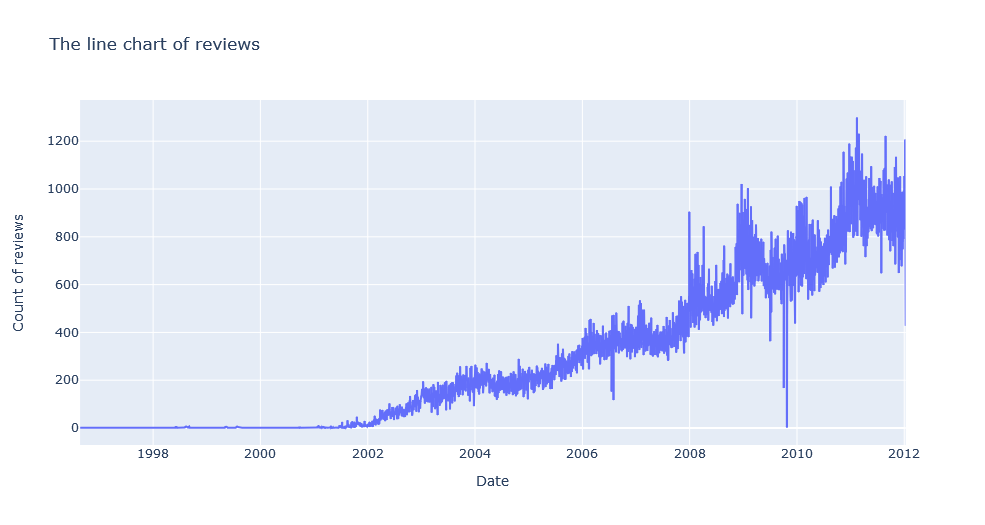



__Data is csv format consisting of:__

- Alcohol by Volume %, 

- Overall Rating (1-5): 
Taste Rating (1-5), Aroma Rating (1-5), Appearance Rating (1-5), Palate Rating (1-5)

- Breweries (5,742 unique breweries)

- Users  (33,387 unique users)

- Beer Names (56,857 unique names)

- Beer Styles (104 unique style)

- Date - 1/01/02 to 12/11/12

- Number of columns, rows, missing values: 13, 1,586,614, 4.27% missing ABV%

- Size of the data: 130.2MB

__Links__

- Link to data if available: ('https://query.data.world/s/gib6aa6n3tmtuvrqpbdlhcbgdg7tk4').


__Connect__


-The most important column in this dataset is review_taste.  Taste has the strongest correlation with review_overall at  79%. 


# Explore the Data

In [2]:
import pandas as pd
import os

In [3]:
df = pd.read_csv('https://query.data.world/s/gib6aa6n3tmtuvrqpbdlhcbgdg7tk4')

In [4]:
df.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


In [5]:
df.shape

(1586614, 13)

In [6]:
round(df.describe(),2)

,brewery_id,review_time,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid
count,1586614.0,1.586614e+06,1586614.00,1586614.00,1586614.00,1586614.00,1586614.00,1518829.00,1586614.00
mean,3130.1,1.224089e+09,3.82,3.74,3.84,3.74,3.79,7.04,21712.79
std,5578.1,7.654427e+07,0.72,0.70,0.62,0.68,0.73,2.32,21818.34
min,1.0,8.406720e+08,0.00,1.00,0.00,1.00,1.00,0.01,3.00
25%,143.0,1.173224e+09,3.50,3.50,3.50,3.50,3.50,5.20,1717.00
50%,429.0,1.239203e+09,4.00,4.00,4.00,4.00,4.00,6.50,13906.00
75%,2372.0,1.288568e+09,4.50,4.00,4.00,4.00,4.50,8.50,39441.00
max,28003.0,1.326285e+09,5.00,5.00,5.00,5.00,5.00,57.70,77317.00


- most reviews rated aroma, appearance, palate & taste between 3.5 to 4.5
- review_overall & review_appearance have 0 ratings when scale is 1-5
- Range of ABV% 0 - 57.7%
- ABV% <8.5% makes up 75% of reviews


In [7]:
# List of numeric factors to include
factors = ["review_appearance","review_aroma","review_palate","review_taste", "review_overall"]

# Create a correlation matrix 
corr_metrics = df[factors].corr()
corr_metrics.style.background_gradient(cmap='Greens')

,review_appearance,review_aroma,review_palate,review_taste,review_overall
review_appearance,1.000000,0.561029,0.566634,0.546980,0.501732
review_aroma,0.561029,1.000000,0.616947,0.716776,0.616013
review_palate,0.566634,0.616947,1.000000,0.734135,0.701914
review_taste,0.546980,0.716776,0.734135,1.000000,0.789816
review_overall,0.501732,0.616013,0.701914,0.789816,1.000000


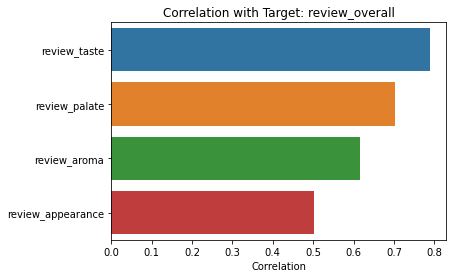

<Figure size 1152x864 with 0 Axes>

In [8]:
# Method 3 - Bar Chart: Plotly
# Correlation with target review_overall
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

factor_corr = corr_metrics[['review_overall']]\
    .drop(['review_overall'])\
    .reset_index()\
    .sort_values('review_overall', ascending=True)

# Method 4 - Bar Chart: Seaborn
# Plot it with Seaborn just for fun
sns.barplot(data=factor_corr.sort_values('review_overall', ascending=False), y="index",x="review_overall")
plt.ylabel(""); plt.xlabel("Correlation")
plt.title("Correlation with Target: review_overall")
plt.figure(figsize=(16,12))
plt.show()

# Prepare Data


#### Created new features
- "beer_strength" for ABV% : NA(Non-Alcoholic), Low, Reg, High

- "Score" takes cumulative ratings for aroma, appearance, palate and taste and sets them to 0-100

In [9]:
import datetime
from datetime import date, datetime
import re
import math
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly as py
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

In [10]:
df['Score'] = ((df['review_appearance'] + df['review_aroma'] + df['review_palate'] + df['review_taste'])*5)

In [11]:
df = df.drop(['brewery_id', 'review_time', 'review_overall', 'review_aroma', 'review_appearance', 'review_profilename', 'review_palate', 'review_taste', 'beer_beerid'], axis=1)

In [12]:
# create a list of our conditions
conditions = [
    (df['beer_abv'] >= 0.0)&(df['beer_abv'] <= 0.5),
    (df['beer_abv'] > 0.5) & (df['beer_abv'] <= 3.2),
    (df['beer_abv'] > 3.2) & (df['beer_abv'] <= 5.999),
    (df['beer_abv'] > 6.0)
    ]

# create a list of the values we want to assign for each condition
values = ['NA', 'Low', 'Reg', 'High']

# create a new column and use np.select to assign values to it using our lists as arguments
df['beer_strength'] = np.select(conditions, values)

# display updated DataFrame
df.head()

,brewery_name,beer_style,beer_name,beer_abv,Score,beer_strength
0,Vecchio Birraio,Hefeweizen,Sausa Weizen,5.0,37.5,Reg
1,Vecchio Birraio,English Strong Ale,Red Moon,6.2,57.5,High
2,Vecchio Birraio,Foreign / Export Stout,Black Horse Black Beer,6.5,57.5,High
3,Vecchio Birraio,German Pilsener,Sausa Pils,5.0,60.0,Reg
4,Caldera Brewing Company,American Double / Imperial IPA,Cauldron DIPA,7.7,85.0,High


# Modeling

Logistic Regression was used because we wanted to know the probablity that a beer style will be rated favorably.  Based on the correlation matrix, review_taste has the highest percent with target review_overall.  I focused on review_taste but yield no conclusive [results.]("https://github.com/tvanwer1/Final-Project/blob/main/Technical%20Notebook/Final_Project_Logistic_Regression.ipynb") 

My next step was to create features. The intent was to add categories and scale to data set. The lack of experience and understanding of python and the different packages lead to many errors. 


# Fine Tune 
 
I utilized the Decision Tree Regressor from sklearn. I chose because of its focus on predicting values. The following results of the rmse = 0.00045711325656622235. Additional information can be reviewed in greater detail [here.]("https://github.com/tvanwer1/Final-Project/blob/main/Technical%20Notebook/DecisionTreeRegressor.ipynb")

I also attempted to perform cross validation. However, I did not return results. The details can be reviewed in the following [notebook.]("https://github.com/tvanwer1/Final-Project/blob/main/Technical%20Notebook/Final_Project_Beer_Cross_validation.ipynb")

# Present Your Solution

 
The results of this project highlight stouts and ales receiving the highest favorability.
Below is a groupby of the top 10 beer styles with a minimum of 10,000 reviews. The score count is number of reviews for given beer style. The Score mean is the mean value 0-100 based on review_aroma, review_appearance, review_palata, & review_taste. The Score median is the median of the same value described above.  Additional analysis of desired styles would be the next phase of this project.

|Beer Style 	|Score count 	|Score mean 	|Score median|
|------------|-----------|---------|--------|
|American Double / Imperial Stout |	49268 |	83.08 |	85.0|
|Quadrupel (Quad) 	|17836 	|82.97 	|82.5|
|Russian Imperial Stout| 	52317 |	82.68 |	85.0|
|American Wild Ale |	16721| 	81.75 |	82.5|
|American Double / Imperial IPA| 	83626 |	81.48 |	82.5|
|American Barleywine |	26023 |	80.54 |	82.5|
|Belgian IPA |	12115 |	80.13 |	80.0|
|American Strong Ale |	31015 |	80.01 |	82.5|
|Baltic Porter |	11219 |	79.94 |	80.0|
|Old Ale| 	14377 |	79.79 |	80.0|


Prior to beginning this project, my initial thought was that lagers would be the style highest rated. Additionally, I was surprised that Anheuser_Busch produces 31 different beer styles & 84 different beer_names out of 104 unique style & 56,587 beer_names respectively within dataset.  Moreover, Yeungling, which is America's oldest brewery, produces 7 different beer styles & 7 different beer_names.  Additionally, ABV% didn't have a clear role. Reviewers tended to rate beers with ABV% greater than 6 more favorably. Contrastly, beers with ABV% below 3.2 were rated more poorly. Whereas beers with ABV% between 4-6 were rated both poorly and favorable. Budweiser would fall is in this category.

![image.png](attachment:visuals/budweiser.jpg)



When the project began, I wasn't certain on results that would be returned.  After exploring the data, a bias amongst the reviwers seemed to present itself. However, I think the results were sufficient to address the business problem. 


#### Limitations

This project was not without its limitations. The following is brief overview of where improvements can be made to tailor this project to breweries of similar size, production capabilities as well having a complete data set to current time period. 

- Reviewers are providing their input freely vs a paid focus group
- BeerAdvocates would have reviwer profiles that could provide demographics and location data. 
- Sales/production data from breweries on beers
- Dimension table on breweries similar to profile for users
- Data ends Dec 2011. Connecting then to now
- My own knowledge and experience using python, sklearn and other packages


I'd imagine for the national brewers, i.e. Anheuser-Busch InBev, Heineken, Molson Coors Brewing, they would have an analytics team working with their brew masters. But for the craft breweries this work could be beneficial.  

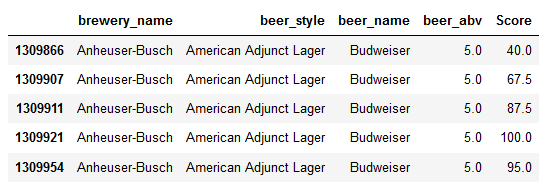